In [1]:
# Estevão Batista Sanchez

In [2]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
import statsmodels.api as sm
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('DATASET.csv',sep=';')

In [4]:
df.head()

,Estado,idade,qtd_item_compra,total_compras,tipo_pgto
0,MG,22,2,502.6,CARTÃO
1,RJ,33,4,100.6,BOLETO
2,RJ,21,7,40.0,BOLETO
3,SP,40,1,45.0,BOLETO
4,ES,21,3,78.9,PIX


In [ ]:
# Verificar os valores Nan
# O dataset não possui valors Nan
print('Estado',df.loc[pd.isna(df['Estado']),'Estado'].shape)
print('idade',df.loc[pd.isna(df['idade']),'idade'].shape)
print('qtd_item_compra',df.loc[pd.isna(df['qtd_item_compra']),'qtd_item_compra'].shape)
print('total_compras',df.loc[pd.isna(df['total_compras']),'total_compras'].shape)
print('tipo_pgto',df.loc[pd.isna(df['tipo_pgto']),'tipo_pgto'].shape)


Estado (0,)
idade (0,)
qtd_item_compra (0,)
total_compras (0,)
tipo_pgto (0,)


In [ ]:
# Verificando valores únicos por coluna
# Definimos as colunas que serão normalizadas e categorizados (função one hot ou variável dummy)

print('Estado',len(df.Estado.unique()),df.Estado.unique())
print('idade',len(df.idade.unique()),df.idade.unique())
print('qtd_item_compra',len(df.qtd_item_compra.unique()),df.qtd_item_compra.unique())
print('total_compras',len(df.total_compras.unique()),df.total_compras.unique())
print('tipo_pgto',len(df.tipo_pgto.unique()),df.tipo_pgto.unique())

Estado 23 ['MG' 'RJ' 'SP' 'ES' 'GO' 'MT' 'MS' 'DF' 'PE' 'PI' 'BA' 'PA' 'PR' 'AM'
 'AC' 'RR' 'RO' 'SE' 'SC' 'RS' 'PB' 'AL' 'TO']
idade 24 [22 33 21 40 35 60 20 18 19 23 31 29 28 32 44 39 34 25 36 24 41 37 50 26]
qtd_item_compra 10 [ 2  4  7  1  3  5  6  8  9 16]
total_compras 76 [ 502.6   100.6    40.     45.     78.9    89.     87.     68.     65.
  424.     57.     52.    242.    985.    224.    222.    509.77  630.
   25.     48.    669.     53.    120.    123.    600.     59.    412.
   90.     80.     55.     36.    336.    124.    568.     66.    687.
   78.     56.    569.     46.     99.    790.   1800.9   879.    698.
   63.    158.    198.    789.    122.    980.    740.    782.    965.
  187.    256.    655.    302.    235.    968.    756.    899.36  456.
   86.    150.    155.    204.    690.    146.    870.   1250.    486.
  189.    999.    250.    245.  ]
tipo_pgto 3 ['CARTÃO' 'BOLETO' 'PIX']


In [ ]:
# Colunas normalizadas pela média, idade, qtd_item_compra , total_compras 

def normaliza_media(valores):
  media = np.mean(valores)
  minimo = np.min(valores)
  maximo = np.max(valores)
  return (valores - media)/(maximo-minimo)

df.idade = normaliza_media(df.idade)
df.qtd_item_compra = normaliza_media(df.qtd_item_compra)
df.total_compras = normaliza_media(df.total_compras)


In [ ]:
df.head(1)

,Estado,idade,qtd_item_compra,total_compras,tipo_pgto
0,MG,-0.112731,-0.130612,0.096121,CARTÃO


In [ ]:
# Colunas Categóricas, tranformadas em númericas como variável dummy

dummies_estado = pd.get_dummies(df['Estado'])
df['Estado_MG'] = dummies_estado['MG']
df['Estado_RJ'] = dummies_estado['RJ']
df['Estado_SP'] = dummies_estado['SP']
df['Estado_ES'] = dummies_estado['ES']
df['Estado_GO'] = dummies_estado['GO']
df['Estado_MT'] = dummies_estado['MT']
df['Estado_MS'] = dummies_estado['MS']
df['Estado_DF'] = dummies_estado['DF']
df['Estado_PE'] = dummies_estado['PE']
df['Estado_PI'] = dummies_estado['PI']
df['Estado_BA'] = dummies_estado['BA']
df['Estado_PA'] = dummies_estado['PA']
df['Estado_PR'] = dummies_estado['PR']
df['Estado_AM'] = dummies_estado['AM']
df['Estado_AC'] = dummies_estado['AC']
df['Estado_RR'] = dummies_estado['RR']
df['Estado_RO'] = dummies_estado['RO']
df['Estado_SE'] = dummies_estado['SE']
df['Estado_SC'] = dummies_estado['SC']
df['Estado_RS'] = dummies_estado['RS']
df['Estado_PB'] = dummies_estado['PB']
df['Estado_AL'] = dummies_estado['AL']
df['Estado_TO'] = dummies_estado['TO']

dummies_tipo_pagamento = pd.get_dummies(df['tipo_pgto'])
df['tipo_pgto_cartao'] = dummies_tipo_pagamento['CARTÃO']
df['tipo_pgto_boleto'] = dummies_tipo_pagamento['BOLETO']
df['tipo_pgto_pix'] = dummies_tipo_pagamento['PIX']



In [ ]:
df.columns


Index(['Estado', 'idade', 'qtd_item_compra', 'total_compras', 'tipo_pgto',
       'Estado_MG', 'Estado_RJ', 'Estado_SP', 'Estado_ES', 'Estado_GO',
       'Estado_MT', 'Estado_MS', 'Estado_DF', 'Estado_PE', 'Estado_PI',
       'Estado_BA', 'Estado_PA', 'Estado_PR', 'Estado_AM', 'Estado_AC',
       'Estado_RR', 'Estado_RO', 'Estado_SE', 'Estado_SC', 'Estado_RS',
       'Estado_PB', 'Estado_AL', 'Estado_TO', 'tipo_pgto_cartao',
       'tipo_pgto_boleto', 'tipo_pgto_pix'],
      dtype='object')

In [ ]:
# dropando as colunas que não serão utilizadas para análise

df.drop('Estado', axis=1, inplace=True)
df.drop('tipo_pgto', axis=1,inplace=True)

In [ ]:
#Exercicio 1

# Aplicando a técnica do cotovelo para determinar o número de clusters

# Chute inicial sempre de 2 clusters até 21

def soma_quadrados_intra_clusters(dataset):

  wcss = []
  for n in range(2,21):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
  return wcss

In [ ]:
# Definindo as colunas que serão analisadas, no caso todas, pois já dropamos as que não iteressavam

caracteristicas = np.array(df)

In [ ]:
# determinando a soma dos quadrados
soma = soma_quadrados_intra_clusters(caracteristicas)

In [ ]:
# determinando o range para gerar o gráfico de análise
n_clusters = list(range(2,21))

Text(0, 0.5, 'Soma dos quadrados ontra-clusters')

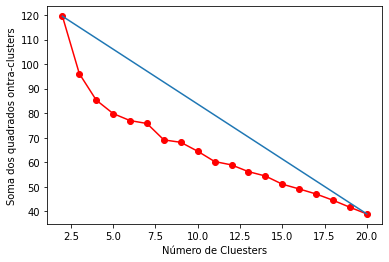

In [ ]:
plt.plot(n_clusters, soma, '-o', color="red")
plt.plot([2,20],[soma[0],soma[-1]])
plt.xlabel("Número de Cluesters")
plt.ylabel("Soma dos quadrados ontra-clusters")

In [ ]:
# Função para determinar o número ótimo de clusters

def numero_otimo_clusters(wcss):
  import math
  x0=2
  y0=wcss[0]
  x1=20
  y1=wcss[-1]
  distancia = []

  for i in range(len(wcss)):
    x =i+2
    y=wcss[i]
    numerador = abs((y1-y0)*x - (x1-x0)*y+x1*y0-y1*x0)
    denominador = math.sqrt((y1-y0)**2+(x1-x0)**2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia))+2

In [ ]:
k_otimo = numero_otimo_clusters(soma)

In [ ]:
print("Número ótimo de clusters: ",k_otimo)

Número ótimo de clusters:  5


In [ ]:
#treinando o modelo

kmeans = KMeans(n_clusters=5, random_state=0)


In [ ]:
kmeans.fit(caracteristicas)

KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.labels_

array([3, 2, 2, 4, 1, 1, 3, 1, 1, 3, 2, 4, 4, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 3, 0, 3, 3, 1, 0, 1, 1, 3, 1,
       2, 3, 0, 0, 3, 1, 4, 3, 1, 3, 1, 3, 0, 3, 3, 3, 3, 1, 0, 2, 2, 2,
       2, 1, 3, 3, 3, 0, 1, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 4, 0, 1, 1, 0,
       1, 0, 2, 0, 3, 1, 3, 3, 3, 3], dtype=int32)

In [ ]:
KMeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
# Determinando o resultado da classificação

y_classificacao = kmeans.predict(caracteristicas)

In [ ]:
# colocando a coluna com os resultados
df['Classe'] = y_classificacao

In [ ]:
df.head(5)

,idade,qtd_item_compra,total_compras,Estado_MG,Estado_RJ,Estado_SP,Estado_ES,Estado_GO,Estado_MT,Estado_MS,...,Estado_SE,Estado_SC,Estado_RS,Estado_PB,Estado_AL,Estado_TO,tipo_pgto_cartao,tipo_pgto_boleto,tipo_pgto_pix,Classe
0,-0.112731,-0.130612,0.096121,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
1,0.149174,0.002721,-0.130243,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,-0.136540,0.202721,-0.164367,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,0.315841,-0.197279,-0.161551,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
4,-0.136540,-0.063946,-0.142463,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Exercício 2
# Selecionando as colunas de saída 

saida = df[['tipo_pgto_cartao','tipo_pgto_boleto','tipo_pgto_pix']]
print(saida)

    tipo_pgto_cartao  tipo_pgto_boleto  tipo_pgto_pix
0                  1                 0              0
1                  0                 1              0
2                  0                 1              0
3                  0                 1              0
4                  0                 0              1
..               ...               ...            ...
93                 0                 0              1
94                 1                 0              0
95                 1                 0              0
96                 1                 0              0
97                 1                 0              0

[98 rows x 3 columns]


In [ ]:
# Selecionando as colunas de entrada 

entradas = df[['idade','qtd_item_compra','total_compras','Estado_MG','Estado_RJ','Estado_SP','Estado_ES','Estado_GO'\
               ,'Estado_MT','Estado_MS','Estado_DF', 'Estado_PE', 'Estado_PI', 'Estado_BA', 'Estado_PA','Estado_PR', 'Estado_AM', 'Estado_AC', 'Estado_RR', 'Estado_RO',
       'Estado_SE', 'Estado_SC', 'Estado_RS', 'Estado_PB', 'Estado_AL','Estado_TO']]


In [ ]:
# Separando o data frame para treino e teste, 20% teste e 80% treino

X_train, X_test, Y_train, Y_test = train_test_split(entradas, saida, test_size=0.20, random_state=42)

In [ ]:
# Calculando o número de neorônios da camada oculta
# Entradas = 26
# saidas = 3

# Range de neuronios entre 15 e 52

nco_1 = (26+3)/2
nco_2 = (2*26)/3 + 3
nco_3 = 2*26

print(nco_1,nco_2,nco_3)

14.5 20.333333333333332 52


In [ ]:
# Determinando os parametros dos modelos de rede neural

# learning_rate_init - taxa de aprendizado inicial usada. Ele controla o tamanho do passo na atualização dos pesos
# max_iter - Número máximo de iterações
# activation - Função utilizada  - Linear
# tol - Tolerância para a otimização
# hidden_layer_sizes - Número de camdas ocultas e neuronios

# 2 camadas ocultas com 40 neuronios

redeneural_1 = MLPClassifier(verbose=True,
                           max_iter=10000,
                           hidden_layer_sizes=(2,40),
                           tol=0.000001,
                           activation='tanh',
                           learning_rate_init = 0.0001)

In [ ]:
# treinando o modelo

redeneural_1.fit(X_train,Y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 5001, loss = 0.97443139
Iteration 5002, loss = 0.97435050
Iteration 5003, loss = 0.97426964
Iteration 5004, loss = 0.97418879
Iteration 5005, loss = 0.97410798
Iteration 5006, loss = 0.97402718
Iteration 5007, loss = 0.97394642
Iteration 5008, loss = 0.97386567
Iteration 5009, loss = 0.97378495
Iteration 5010, loss = 0.97370426
Iteration 5011, loss = 0.97362358
Iteration 5012, loss = 0.97354294
Iteration 5013, loss = 0.97346231
Iteration 5014, loss = 0.97338172
Iteration 5015, loss = 0.97330114
Iteration 5016, loss = 0.97322059
Iteration 5017, loss = 0.97314006
Iteration 5018, loss = 0.97305956
Iteration 5019, loss = 0.97297908
Iteration 5020, loss = 0.97289863
Iteration 5021, loss = 0.97281820
Iteration 5022, loss = 0.97273779
Iteration 5023, loss = 0.97265741
Iteration 5024, loss = 0.97257705
Iteration 5025, loss = 0.97249672
Iteration 5026, loss = 0.97241641
Iteration 5027, loss = 0.97233612
Iteration 5028, loss = 

MLPClassifier(activation='tanh', hidden_layer_sizes=(2, 40),
              learning_rate_init=0.0001, max_iter=10000, tol=1e-06,
              verbose=True)

In [ ]:
# resultado da acurácia
# Modelo tanh foi o que obteve maior acurácia
# significa que o acerto da previsão do modelo acerta 45% dos resultados (Infelizmente é melhor utilizar uma moeda)

redeneural_1.score(X_test,Y_test)

0.4

In [ ]:
# Linear retificada

redeneural_4 = MLPClassifier(verbose=True,
                           max_iter=10000,
                           hidden_layer_sizes=(2,40),
                           tol=0.000001,
                           activation='relu',
                           learning_rate_init = 0.0001)

In [ ]:
# Treinando o modelo
redeneural_4.fit(X_train,Y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 5001, loss = 0.99397794
Iteration 5002, loss = 0.99389775
Iteration 5003, loss = 0.99381694
Iteration 5004, loss = 0.99373756
Iteration 5005, loss = 0.99365786
Iteration 5006, loss = 0.99357850
Iteration 5007, loss = 0.99349822
Iteration 5008, loss = 0.99341724
Iteration 5009, loss = 0.99333743
Iteration 5010, loss = 0.99325772
Iteration 5011, loss = 0.99317780
Iteration 5012, loss = 0.99309750
Iteration 5013, loss = 0.99301753
Iteration 5014, loss = 0.99293854
Iteration 5015, loss = 0.99285859
Iteration 5016, loss = 0.99278036
Iteration 5017, loss = 0.99269905
Iteration 5018, loss = 0.99262084
Iteration 5019, loss = 0.99254180
Iteration 5020, loss = 0.99246176
Iteration 5021, loss = 0.99238138
Iteration 5022, loss = 0.99230288
Iteration 5023, loss = 0.99222364
Iteration 5024, loss = 0.99214482
Iteration 5025, loss = 0.99206537
Iteration 5026, loss = 0.99198572
Iteration 5027, loss = 0.99190706
Iteration 5028, loss = 

MLPClassifier(hidden_layer_sizes=(2, 40), learning_rate_init=0.0001,
              max_iter=10000, tol=1e-06, verbose=True)

In [ ]:
# Resultado da acurácia
redeneural_4.score(X_test,Y_test)

0.4

In [ ]:
# Extra
# Três estados que mais compram

df_extra = pd.read_csv('DATASET.csv',sep=';')



In [ ]:
df_extra.columns

Index(['Estado', 'idade', 'qtd_item_compra', 'total_compras', 'tipo_pgto'], dtype='object')

In [ ]:
# agrupando os estados e somando o total de compras
df_estados_mais_compram = df_extra.groupby(['Estado']).agg(qnt_compra=pd.NamedAgg('total_compras','sum')).reset_index()


In [ ]:
df_estados_mais_compram

,Estado,qnt_compra
0,AC,195.00
1,AL,78.00
2,AM,1671.00
3,BA,48.00
4,DF,2124.00
5,ES,469.90
6,GO,1742.00
7,MG,2541.60
8,MS,1709.00
9,MT,68.00


In [ ]:
# Ordenando os 3 com maiores números de compras

df_estados_ordenados = df_estados_mais_compram.sort_values(['qnt_compra'], ascending=False)
print(df_estados_ordenados)

   Estado  qnt_compra
21     SP     9965.90
19     SC     2567.00
7      MG     2541.60
4      DF     2124.00
18     RS     2054.00
10     PA     2021.36
11     PB     1879.00
6      GO     1742.00
8      MS     1709.00
2      AM     1671.00
15     RJ     1511.37
12     PE      630.00
22     TO      495.00
5      ES      469.90
14     PR      362.00
20     SE      198.00
0      AC      195.00
16     RO       91.00
17     RR       80.00
1      AL       78.00
9      MT       68.00
3      BA       48.00
13     PI       25.00


In [ ]:
# Três estados que mais compram
df_resposta = df_estados_ordenados[['Estado','qnt_compra']].head(3)
print(df_resposta)

   Estado  qnt_compra
21     SP      9965.9
19     SC      2567.0
7      MG      2541.6


In [ ]:
# Método preferido

df_metodos_pagamento_preferido = df_extra.groupby(['tipo_pgto']).agg(qnt_tipo_pagamento=pd.NamedAgg('tipo_pgto','count')).reset_index()

In [ ]:
# Ordenando
df_principal_metodo = df_metodos_pagamento_preferido.sort_values(['qnt_tipo_pagamento'], ascending=False)
df_principal_metodo.head(1)

,tipo_pgto,qnt_tipo_pagamento
1,CARTÃO,51


In [ ]:
# Média de idade
df_extra['idade'].mean()

26.73469387755102

In [ ]:
# Maior venda e o método de pagamento

df_maior_venda = df_extra.sort_values(['total_compras'], ascending=False)
print(df_maior_venda[['total_compras','tipo_pgto']].head(1))

    total_compras tipo_pgto
46         1800.9    CARTÃO
